In [1]:
from matplotlib import pyplot as plt
plt.rcParams.update({
  "text.usetex": True,
  "font.family": "Computer Modern Roman",
  "font.size":    14.0
})
import sys
sys.path.append('..')

from geminids.read_data import *

In [2]:
fig_pth = "../figs"

## Load Data

In [3]:
points, elements, masses = load_all_data()


Loaded ../output/cached/points_0.npy
Loaded ../output/cached/mass_0.npy
Loaded ../output/cached/elements_0.npy
Loaded ../output/cached/points_1.npy
Loaded ../output/cached/mass_1.npy
Loaded ../output/cached/elements_1.npy
Loaded ../output/cached/points_2.npy
Loaded ../output/cached/mass_2.npy
Loaded ../output/cached/elements_2.npy


## Column Densities

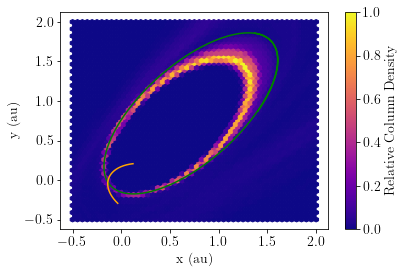

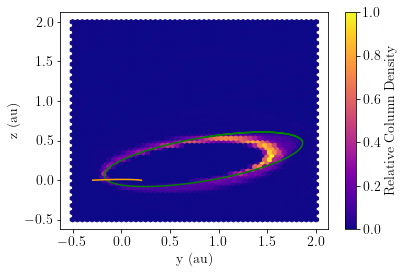

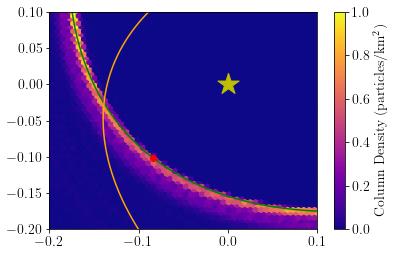

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


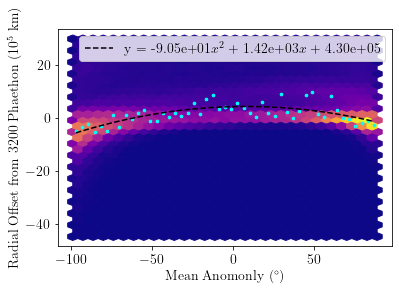

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


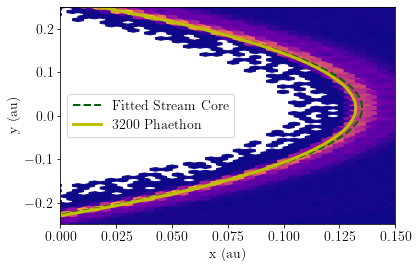

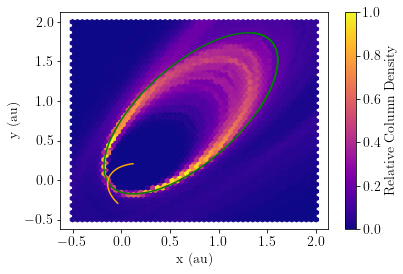

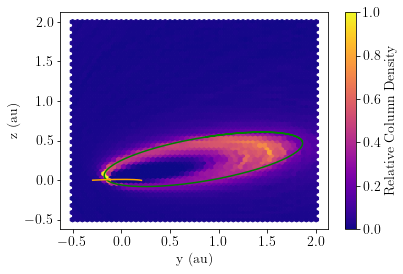

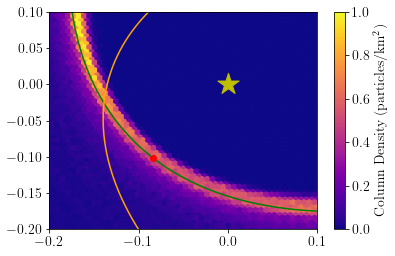

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


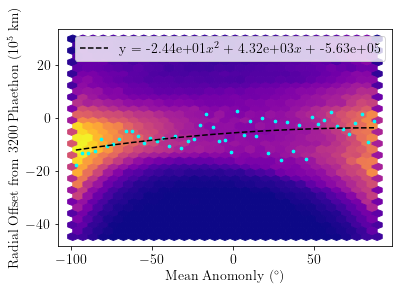

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


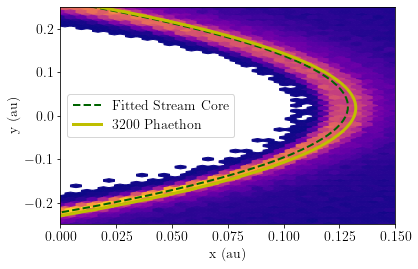

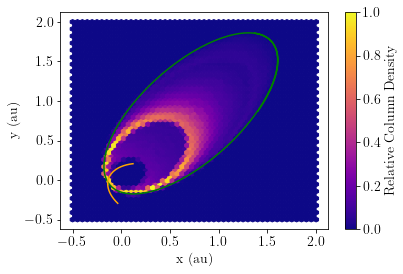

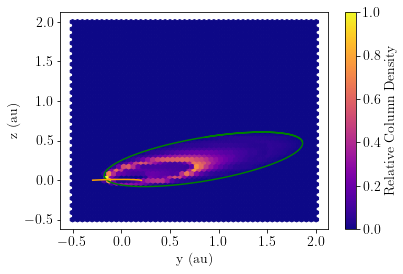

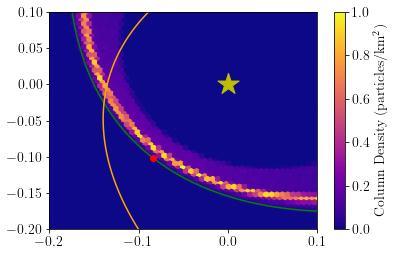

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


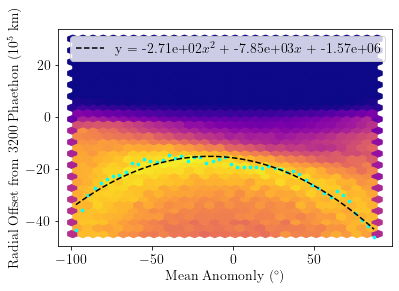

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


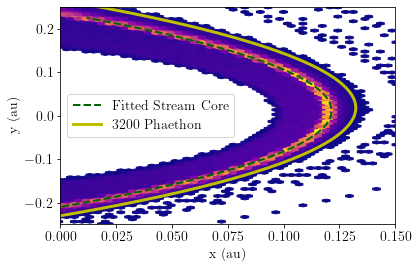

In [4]:
n = [100, 100, 1000]
orbit = get_phaethon_orbit()
psp = get_parker_orbit()

for i in range(3):
    p = points[i]
    plot_column_density(p, orbit, psp, 50, 'xy')
    plt.savefig(f"{fig_pth}/column_xy_{i}.eps")
    plt.show()
    
    plot_column_density(p, orbit, psp, 50, 'yz')
    plt.savefig(f"{fig_pth}/column_yz_{i}.eps")
    plt.show()
    
    

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


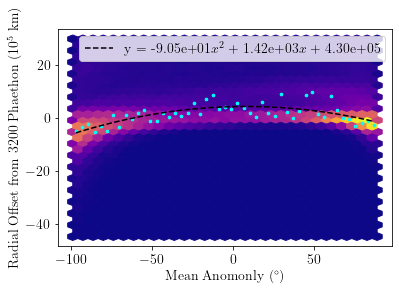

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


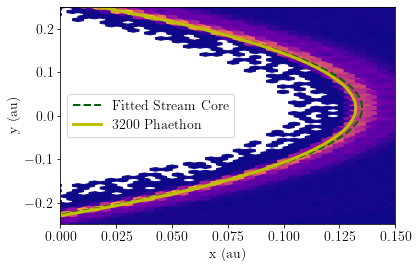

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


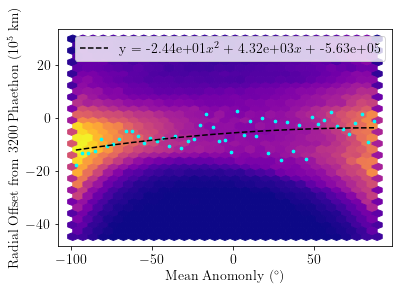

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


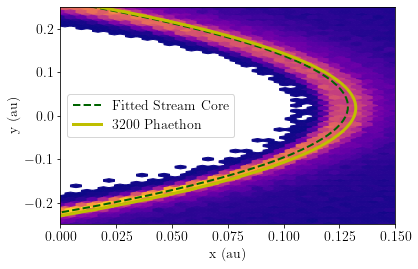

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


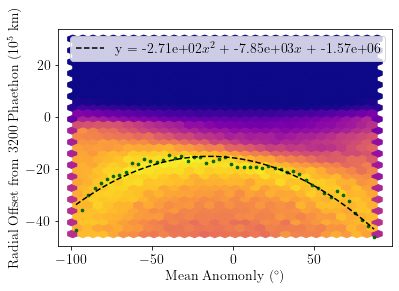

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


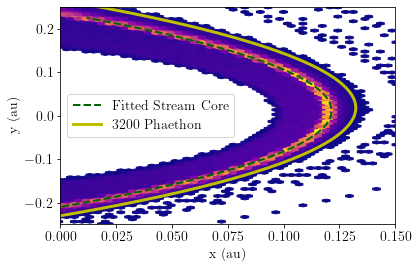

In [5]:
n = [100, 100, 1000]
orbit = get_phaethon_orbit()
psp = get_parker_orbit()
c = ["cyan", "cyan", "darkgreen"]


for i in range(3):
    p = points[i]
    
    peri_fit = fit_perihelion(p, orbit)
    
    plot_residual_fit(peri_fit, color=c[i])
    plt.savefig(f"{fig_pth}/residual_{i}.eps")
    plt.show()
    
    plot_smoothed_fit(peri_fit)
    plt.savefig(f"{fig_pth}/smooth_fit_{i}.eps")
    plt.show()

## Elements

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


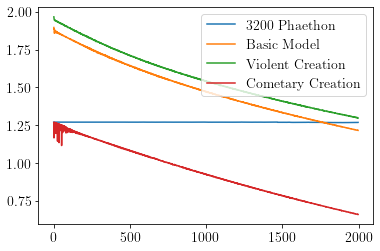

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


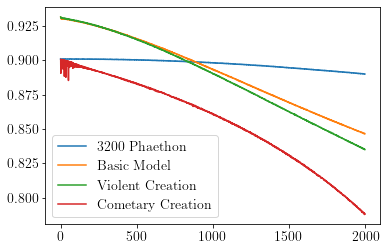

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


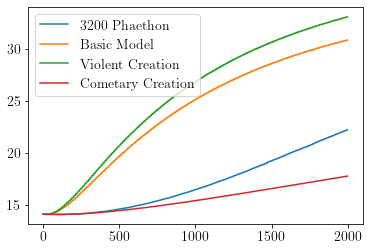

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


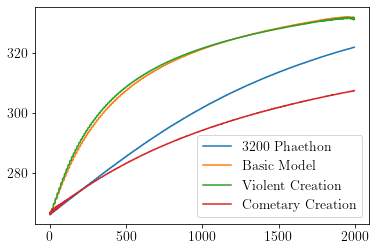

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


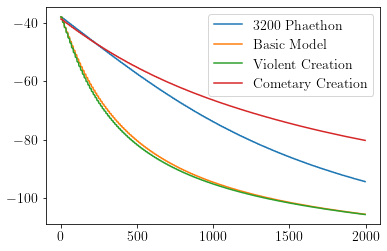

In [9]:
plot_elements(elements[0], elements[1], elements[2], save=True, pth=f"{fig_pth}/elements")

## Geminids at Earth

100%|██████████| 8000/8000 [00:12<00:00, 646.85it/s] 


The estimated mass for the BASE model is:		3.50e+14
The estimated mass for the VEL model is:		1.18e+14
The estimated mass for the DISTR model is:		6.34e+14


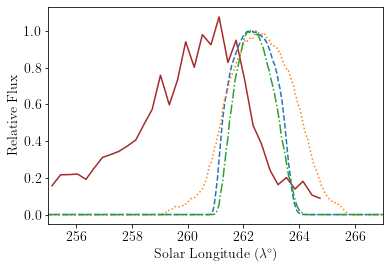

The peak longitude for the BASIC model is:		262.2621859821756
The peak longitude for the VIOLENT model is:		262.4479584713676
The peak longitude for the COMETARY model is:		262.2621859821756


In [8]:
points_m5 = []
KDTrees = []
for i in range(3):
    point_m5, KDTree = generate_KDTree(points[i], 1e-5, 0.9, 1.1)
    points_m5.append(point_m5)
    KDTrees.append(KDTree)

rates, long, t = rate_at_earth(points_m5, KDTrees, r=0.03)
calibrated_masses = [calibrated_mass(masses[i], rates[i]) * adjustment_factor(1e-5) for i in range(3)]

print(f"The estimated mass for the BASE model is:\t\t{'{:.2e}'.format(calibrated_masses[0])}")
print(f"The estimated mass for the VEL model is:\t\t{'{:.2e}'.format(calibrated_masses[1])}")
print(f"The estimated mass for the DISTR model is:\t\t{'{:.2e}'.format(calibrated_masses[2])}")

peaks = plot_at_earth(rates, 
                      long, 
                      labels=["Basic Model", "Violent Creation", "Cometary Creation"],
                      plot_cmor=True) 
plt.savefig(f"{fig_pth}/rates_at_earth.eps")
plt.show()

print(f"The peak longitude for the BASIC model is:\t\t{peaks[0]}")
print(f"The peak longitude for the VIOLENT model is:\t\t{peaks[1]}")
print(f"The peak longitude for the COMETARY model is:\t\t{peaks[2]}")

## Spectogram Plots

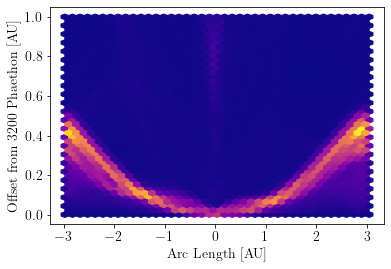

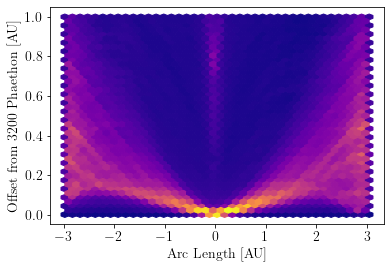

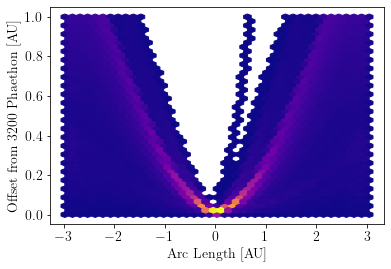

In [7]:
for i in range(3):
    spectogram_plot(points[i])
    plt.savefig(f"{fig_pth}/spectogram_{i}.eps")
    plt.show()

## PSP

100%|██████████| 800/800 [02:31<00:00,  5.27it/s]  


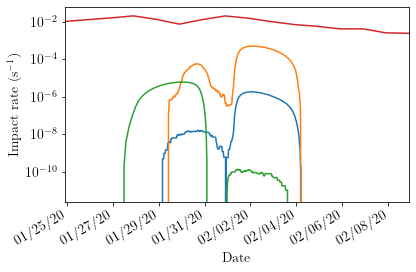

In [6]:
points_kd = []
KDTrees = []
for i in range(3):
    point_kd, KDTree = generate_KDTree(points[i], 0, 0, 0.2)
    points_kd.append(point_kd)
    KDTrees.append(KDTree)

rates, t = rate_at_psp(points, KDTrees, masses, n=800, r =0.05, norm = 1e14)

plot_at_psp(rates, t, ["Basic Model", "Violent Creation", "Cometary Creation"])
plt.tight_layout()
plt.savefig(f"{fig_pth}/rate_at_psp.eps")

In [12]:
np.max(rates[0])

1.8669069940596502e-06

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


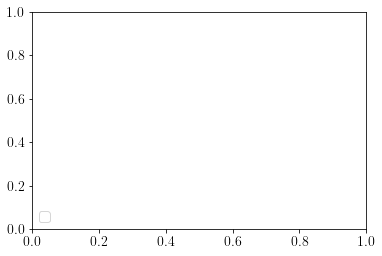

In [16]:
plt.legend(loc=3)

7.141790511357606